In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

2024-05-27 20:38:16.813360: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 20:38:16.813457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 20:38:16.931086: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data=pd.read_csv('/kaggle/input/skin-cancer-classification/hmnist_28_28_L.csv')

In [3]:
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,172,171,173,175,164,187,207,210,208,206,...,210,217,221,209,185,187,192,192,192,0
10011,2,34,108,116,114,119,131,139,139,145,...,173,169,168,168,143,138,83,23,3,0
10012,122,154,162,170,179,197,200,195,202,199,...,221,215,205,187,209,198,187,164,156,0
10013,137,143,141,139,147,152,155,152,155,159,...,172,171,175,183,177,170,169,166,170,0


In [4]:
data.isnull().sum().sum()

0

In [5]:
data.shape

(10015, 785)

In [6]:
labels=data['label']

In [7]:
data=data.drop('label',axis=1)
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,169,171,170,177,181,182,181,185,194,192,...,176,184,186,185,180,157,140,140,159,165
1,19,57,105,140,149,148,144,155,170,170,...,181,172,175,160,144,114,89,47,18,18
2,155,163,161,167,167,172,155,152,165,175,...,162,163,178,157,166,167,148,141,136,115
3,25,71,116,139,136,153,148,161,172,162,...,142,125,135,138,137,111,71,32,16,16
4,129,162,181,196,205,208,205,213,225,224,...,211,210,197,172,190,195,193,181,147,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,172,171,173,175,164,187,207,210,208,206,...,210,210,217,221,209,185,187,192,192,192
10011,2,34,108,116,114,119,131,139,139,145,...,184,173,169,168,168,143,138,83,23,3
10012,122,154,162,170,179,197,200,195,202,199,...,223,221,215,205,187,209,198,187,164,156
10013,137,143,141,139,147,152,155,152,155,159,...,178,172,171,175,183,177,170,169,166,170


There are 7 possible labels.

From the dataset provider:



1.    nv - Melanocytic nevi
2.    mel - Melanoma
3.  bkl - Benign keratosis-like lesion
4.akiec - Actinic keratoses and intraepithelial carcinoma / Bowen's disease
5.vasc - Vascular lesions
6.df - Dermatofibroma


In [8]:
labels.value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [9]:
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

In [10]:
data=data/255
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,0.662745,0.670588,0.666667,0.694118,0.709804,0.713725,0.709804,0.725490,0.760784,0.752941,...,0.690196,0.721569,0.729412,0.725490,0.705882,0.615686,0.549020,0.549020,0.623529,0.647059
1,0.074510,0.223529,0.411765,0.549020,0.584314,0.580392,0.564706,0.607843,0.666667,0.666667,...,0.709804,0.674510,0.686275,0.627451,0.564706,0.447059,0.349020,0.184314,0.070588,0.070588
2,0.607843,0.639216,0.631373,0.654902,0.654902,0.674510,0.607843,0.596078,0.647059,0.686275,...,0.635294,0.639216,0.698039,0.615686,0.650980,0.654902,0.580392,0.552941,0.533333,0.450980
3,0.098039,0.278431,0.454902,0.545098,0.533333,0.600000,0.580392,0.631373,0.674510,0.635294,...,0.556863,0.490196,0.529412,0.541176,0.537255,0.435294,0.278431,0.125490,0.062745,0.062745
4,0.505882,0.635294,0.709804,0.768627,0.803922,0.815686,0.803922,0.835294,0.882353,0.878431,...,0.827451,0.823529,0.772549,0.674510,0.745098,0.764706,0.756863,0.709804,0.576471,0.345098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.674510,0.670588,0.678431,0.686275,0.643137,0.733333,0.811765,0.823529,0.815686,0.807843,...,0.823529,0.823529,0.850980,0.866667,0.819608,0.725490,0.733333,0.752941,0.752941,0.752941
10011,0.007843,0.133333,0.423529,0.454902,0.447059,0.466667,0.513725,0.545098,0.545098,0.568627,...,0.721569,0.678431,0.662745,0.658824,0.658824,0.560784,0.541176,0.325490,0.090196,0.011765
10012,0.478431,0.603922,0.635294,0.666667,0.701961,0.772549,0.784314,0.764706,0.792157,0.780392,...,0.874510,0.866667,0.843137,0.803922,0.733333,0.819608,0.776471,0.733333,0.643137,0.611765
10013,0.537255,0.560784,0.552941,0.545098,0.576471,0.596078,0.607843,0.596078,0.607843,0.623529,...,0.698039,0.674510,0.670588,0.686275,0.717647,0.694118,0.666667,0.662745,0.650980,0.666667


In [11]:
X=np.array(data)
X.shape

(10015, 784)

In [12]:
X=X.reshape(-1,28,28,1)
X.shape

(10015, 28, 28, 1)

In [13]:
sample_data = pd.Series(list(zip(X, labels))).sample(9)

sample_X = np.stack(np.array(sample_data.apply(lambda x: x[0])))
sample_y = np.array(sample_data.apply(lambda x: x[1]))

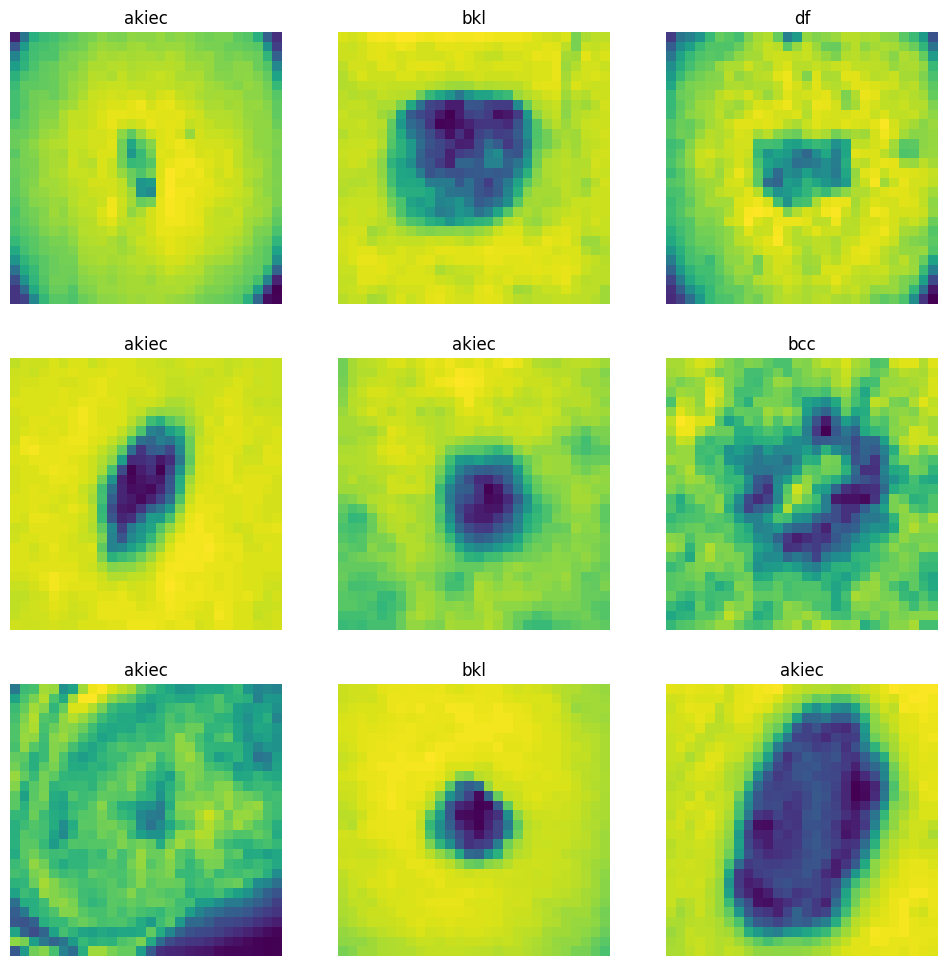

In [14]:
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(sample_X[i]))
    img_label = label_mapping[sample_y[i]]
    plt.title(img_label)
    plt.axis("off")

plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, train_size=0.7, random_state=123)

In [16]:
from tensorflow.keras import datasets, layers, models

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,554 (236.54 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 50

history = cnn.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
 72/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - loss: 1.5463  

I0000 00:00:1716840033.890322     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6600 - loss: 1.3724 - val_accuracy: 0.6583 - val_loss: 1.1427
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6804 - loss: 1.0664 - val_accuracy: 0.6583 - val_loss: 1.0651
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6786 - loss: 1.0240 - val_accuracy: 0.6583 - val_loss: 1.0621
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6799 - loss: 1.0057 - val_accuracy: 0.6427 - val_loss: 1.0680
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6725 - loss: 0.9986 - val_accuracy: 0.6569 - val_loss: 1.0345
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 0.9787 - val_accuracy: 0.6605 - val_loss: 1.0283
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6819 - loss: 0.9647 - val_accuracy: 0.6612 - val_loss: 0.9941
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6800 - loss: 0.9474 - val_accuracy: 0.6598 - val

In [24]:
model_acc = cnn.evaluate(X_test, y_test, verbose=0)[1]

print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 70.948%


In [25]:
y_true = np.array(y_test)

y_pred = cnn.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [26]:
cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


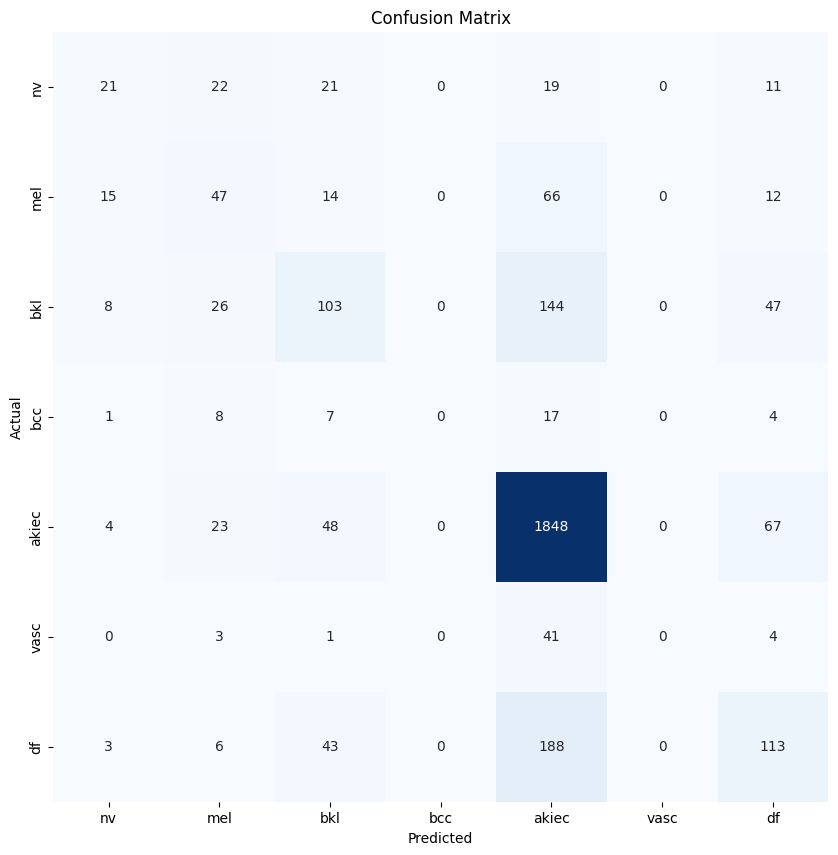

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')

plt.xticks(np.arange(7) + 0.5, label_mapping.values())
plt.xlabel("Predicted")

plt.yticks(np.arange(7) + 0.5, label_mapping.values())
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

In [28]:
print(clr)

              precision    recall  f1-score   support

          nv       0.40      0.22      0.29        94
         mel       0.35      0.31      0.33       154
         bkl       0.43      0.31      0.36       328
         bcc       0.00      0.00      0.00        37
       akiec       0.80      0.93      0.86      1990
        vasc       0.00      0.00      0.00        49
          df       0.44      0.32      0.37       353

    accuracy                           0.71      3005
   macro avg       0.35      0.30      0.31      3005
weighted avg       0.66      0.71      0.68      3005



In [21]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE

In [19]:
# Reshape X to 2D (num_samples, num_features)
num_samples, height, width, channels = X.shape
X_reshaped = X.reshape((num_samples, height * width * channels))

In [20]:
# Convert labels to a pandas DataFrame for easier manipulation
labels_df = pd.DataFrame(labels, columns=['label'])


In [21]:
# Count the number of samples for each label
label_counts = labels_df['label'].value_counts()

In [22]:
# Filter labels with less than 1000 samples
labels_to_augment = label_counts[label_counts < 1000].index.tolist()

In [23]:
# Separate the data for the labels that need augmentation
X_to_augment = X_reshaped[labels_df['label'].isin(labels_to_augment)]
labels_to_augment_data = labels_df[labels_df['label'].isin(labels_to_augment)]

In [24]:
# Initialize SMOTE
smote = SMOTE()

In [25]:
# Apply SMOTE to the subset of data
X_resampled, y_resampled = smote.fit_resample(X_to_augment, labels_to_augment_data['label'])


In [26]:
# Combine the resampled data with the original data
X_augmented_reshaped = np.vstack((X_reshaped, X_resampled))
labels_augmented = np.hstack((labels, y_resampled))

In [27]:
# Reshape X_augmented back to the original shape
X_augmented = X_augmented_reshaped.reshape((X_augmented_reshaped.shape[0], height, width, channels))
X_augmented.shape

(12071, 28, 28, 1)

In [28]:
# Display the distribution of the augmented labels
print("Original label distribution:", Counter(labels))
print("Augmented label distribution:", Counter(labels_augmented))

Original label distribution: Counter({4: 6705, 6: 1113, 2: 1099, 1: 514, 0: 327, 5: 142, 3: 115})
Augmented label distribution: Counter({4: 6705, 6: 1113, 2: 1099, 1: 1028, 0: 841, 5: 656, 3: 629})


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_augmented, labels_augmented, train_size=0.7, random_state=123)

In [45]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 50

history2 = cnn.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7652 - loss: 0.6311 - val_accuracy: 0.6615 - val_loss: 0.9685
Epoch 2/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7848 - loss: 0.6053 - val_accuracy: 0.6781 - val_loss: 0.9276
Epoch 3/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7852 - loss: 0.6006 - val_accuracy: 0.6657 - val_loss: 0.9592
Epoch 4/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7900 - loss: 0.5884 - val_accuracy: 0.6680 - val_loss: 0.9300
Epoch 5/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7961 - loss: 0.5701 - val_accuracy: 0.6722 - val_loss: 0.9529
Epoch 6/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7679 - loss: 0.6248 - val_accuracy: 0.6746 - val_loss: 0.9762
Epoch 7/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8001 - loss: 0.5508 - val_accuracy: 0.6769 - val_loss: 0.9518
Epoch 8/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8043 - loss: 0.5388 - val_accuracy: 0

In [46]:
model_acc = cnn.evaluate(X_test, y_test, verbose=0)[1]

print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 68.691%


In [47]:
y_true = np.array(y_test)

y_pred = cnn.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [48]:
cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())

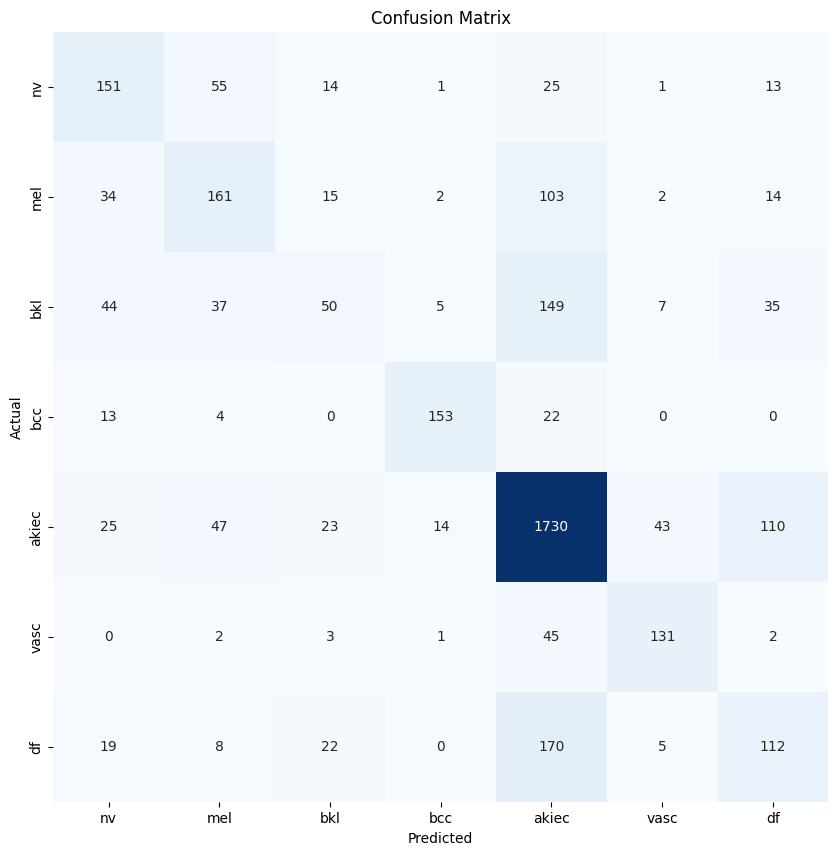

In [49]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')

plt.xticks(np.arange(7) + 0.5, label_mapping.values())
plt.xlabel("Predicted")

plt.yticks(np.arange(7) + 0.5, label_mapping.values())
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

**RESNET50**

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence

In [31]:
# Reshape and upsample your images to (224, 224, 3)
X_augmented_resized = tf.image.resize(X_augmented, [224, 224])
X_augmented_resized = tf.image.grayscale_to_rgb(X_augmented_resized)
X_augmented_resized.shape

TensorShape([12071, 224, 224, 3])

In [32]:
X_augmented_resized = X_augmented_resized / 255.0

ResourceExhaustedError: {{function_node __wrapped__RealDiv_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:RealDiv] name: 

In [37]:
# Convert TensorFlow tensor to NumPy array if needed
if isinstance(X_augmented_resized, tf.Tensor):
    X_augmented_resized = X_augmented_resized.numpy()


In [39]:
X_augmented_resized_normalized = normalize_data(X_augmented_resized)

In [40]:
# Convert labels to categorical (one-hot encoding)
num_classes = len(np.unique(labels_augmented))
labels_augmented_categorical = to_categorical(labels_augmented, num_classes=num_classes)
num_classes

7

In [41]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_augmented_resized_normalized, labels_augmented_categorical, test_size=0.2, random_state=42)


In [42]:
# Create a data generator
class DataGenerator(Sequence):
    def __init__(self, images, labels, batch_size, shuffle=True):
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(self.images))
        self.on_epoch_end()

In [43]:
def __len__(self):
        return int(np.ceil(len(self.images) / self.batch_size))  # Implemented the __len__ method


In [44]:
 def __getitem__(self, index):
        batch_indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        batch_images = self.images[batch_indices]
        batch_labels = self.labels[batch_indices]
        return batch_images, batch_labels


In [45]:
def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

In [46]:
batch_size = 32
train_generator = DataGenerator(X_train, y_train, batch_size)
validation_generator = DataGenerator(X_val, y_val, batch_size)

In [47]:
# Load the base model
base_model = MobileNetV2(weights='/kaggle/input/mobilenet/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5', include_top=False, input_shape=(224, 224, 3))


In [48]:
# Add custom layers on top of MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)


In [49]:
# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


In [51]:
# Compile the model
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)

NotImplementedError: 

In [52]:
X_augmented_resized = X_augmented_resized / 255.0

In [53]:
def create_dataset(images, labels, batch_size, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(images))
    dataset = dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [ ]:
batch_size = 32
train_dataset = create_dataset(X_train, y_train, batch_size)
val_dataset = create_dataset(X_val, y_val, batch_size, shuffle=False)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=10, validation_data=val_dataset)